In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('50_Startups.csv')
print(df.shape)
df.head(3)

(50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Text(0, 0.5, 'Profit')

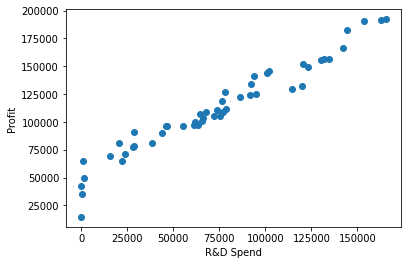

In [12]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

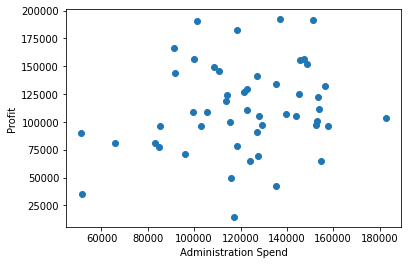

In [13]:
plt.scatter(df['Administration'],df['Profit'])
plt.xlabel('Administration Spend')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

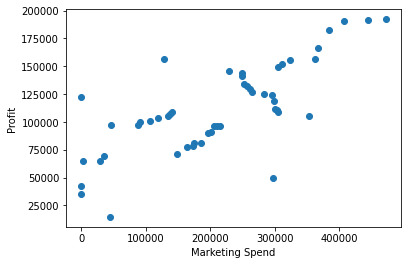

In [14]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

### Lable Encoding:
on Ordinal Categorical Data

In [22]:
# from sklearn.preprocessing import LabelEncoder
# le =LabelEncoder()

In [26]:
# df['State']=le.fit_transform(df['State'])

### One Hot Encoding:
on Nominal Categorical Data

In [3]:
df=pd.get_dummies(df,columns=['State'],drop_first=True)

In [4]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


### X & y:

In [12]:
y=df['Profit']

In [46]:
X=df.drop(columns=['Profit'],axis=1)
# X=df[['R&D Spend','Marketing Spend']]

### Split:

In [27]:
X.shape

(50, 1)

In [28]:
y.shape

(50,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)

In [30]:
X_train.shape

(37, 1)

In [31]:
X_test.shape

(13, 1)

### Build Machine Learning Model:

In [48]:
from sklearn.linear_model import LinearRegression
adi_model = LinearRegression()

In [49]:
adi_model.fit(X_train,y_train)

LinearRegression()

### Predictions:

R&D  , Admin, Marketing, 

[120000, 100000, 150000, 1 , 0]

In [51]:
adi_model.predict([[120000, 100000, 150000, 1 , 0]])

array([143857.38411482])

In [52]:
adi_model.predict([[20000, 100000, 150000, 1 , 0]])

array([65758.32523314])

In [53]:
X_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0
27,72107.60,127864.55,353183.81,0,1
38,20229.59,65947.93,185265.10,0,1
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
4,142107.34,91391.77,366168.42,1,0


In [58]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
Name: Profit, dtype: float64

In [50]:
y_pred= adi_model.predict(X_test)
y_pred

array([104440.72582616, 132253.81567698, 132872.07174272,  71707.78771428,
       178678.9934985 , 115078.13124331,  66093.9297267 ,  98759.7276409 ,
       114113.5994088 , 167979.49411476,  95786.77295823,  87785.3497979 ,
       110455.98228344])

#### Evaluation:
on actual and Predicted Outcomes:

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test,y_pred))

8591.234654128652

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.931581519915206

if this(R2) value is close to 1 , my model is perfect